In [1]:
#Import libraries
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# import tensorflow as tf  # acts as the framework upon which this model is built
import numpy as np  # basic scientific computation
import pandas as pd #for data science
import scipy
import matplotlib.pyplot as plt #ploting 
import seaborn as sns; sns.set_style('darkgrid') #ploting
my_dpi=96 #dots per inch. Used in the size of the plots
 
import csv #library for handling csv files 

import statsmodels.api as sm #library for statistical modeling



ModuleNotFoundError: No module named 'tensorflow'

In [4]:
df = pd.read_csv('bank/bank-full.csv', sep=';')

# Group age by percentages of 10
labels = [0] + [f'{i+10}' for i in range(10, 100, 10)]
df['age_groups'] = pd.qcut(df['age'], 10, labels=labels)
df.age_groups = df.age_groups.astype("int")
# print(df[['age', 'age_groups']])

# Switch all categorical vallues to numerical
df.job = df.job.replace(["admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services"], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

df.marital = df.marital.replace(["married", "divorced", "single"], [1, 2, 3])

df.education = df.education.replace(
    ["unknown", "secondary", "primary", "tertiary"], [1, 2, 3, 4])

df.default = df.default.replace(["yes", "no"], [1, 2])

df.housing = df.housing.replace(["yes", "no"], [1, 2])

df.loan = df.loan.replace(["yes", "no"], [1, 2])

df.contact = df.contact.replace(
    ["unknown", "telephone", "cellular"], [1, 2, 3])

df.month = df.month.replace(["jan", "feb", "mar", "apr", "may", "jun", "jul",
                            "aug", "sep", "oct", "nov", "dec"], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

df.poutcome = df.poutcome.replace(
    ["unknown", "other", "failure", "success"], [2, 3, 0, 1])

df.y = df.y.replace(["yes", "no"], [1, 0])


In [5]:
# Correlation of variables.
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_groups
age,1.000000,0.044237,-0.376104,-0.019044,0.017879,0.097783,0.185513,0.015655,-0.026221,-0.009120,0.092903,-0.004648,0.004760,-0.023758,0.001288,-0.011541,0.025155,0.953095
job,0.044237,1.000000,-0.034681,-0.209193,-0.002825,-0.030025,-0.035074,-0.026080,-0.039296,0.008361,-0.010099,0.012426,0.010301,-0.008086,-0.016064,0.014134,-0.024649,0.023319
marital,-0.376104,-0.034681,1.000000,0.048662,-0.009584,-0.020602,0.020202,0.046738,0.040757,-0.007701,-0.069718,0.022895,-0.029121,0.029490,0.015676,-0.002945,0.065668,-0.407775
education,-0.019044,-0.209193,0.048662,1.000000,0.013916,0.073295,0.082156,0.038771,0.108624,0.013607,0.072804,-0.000389,0.014960,-0.012525,0.017587,-0.010682,0.046539,-0.021981
default,0.017879,-0.002825,-0.009584,0.013916,1.000000,0.066745,-0.006025,0.077234,0.015404,-0.009424,-0.014989,0.010021,-0.016822,0.029979,0.018329,-0.026062,0.022419,0.013490
balance,0.097783,-0.030025,-0.020602,0.073295,0.066745,1.000000,0.068768,0.084350,0.027273,0.004503,0.094605,0.021560,-0.014578,0.003435,0.016674,-0.017669,0.052838,0.084400
housing,0.185513,-0.035074,0.020202,0.082156,-0.006025,0.068768,1.000000,0.041323,0.188123,0.027982,0.173887,-0.005075,0.023599,-0.124178,-0.037076,0.061869,0.139173,0.147139
loan,0.015655,-0.026080,0.046738,0.038771,0.077234,0.084350,0.041323,1.000000,-0.010873,-0.011370,-0.021638,0.012412,-0.009980,0.022754,0.011043,-0.013531,0.068185,0.004023
contact,-0.026221,-0.039296,0.040757,0.108624,0.015404,0.027273,0.188123,-0.010873,1.000000,0.027936,0.173779,0.020839,-0.019614,0.244816,0.147811,-0.193538,0.148395,-0.041646
day,-0.009120,0.008361,-0.007701,0.013607,-0.009424,0.004503,0.027982,-0.011370,0.027936,1.000000,0.101989,-0.030206,0.162490,-0.093044,-0.051710,0.061163,-0.028348,-0.007146


In [6]:
# Split useable and target group
useColumns = df[['age_groups', 'job', 'marital',  'education', 'default', 'balance', 'housing', 'loan',
                 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']].values.tolist()
target = df[['y']].values.tolist()


In [7]:
# C-Support Vector Classification.

estimators = [('reduce_dim', PCA()), ('clf', SVC())]
pipe = Pipeline(estimators, verbose=True)


useColumns_train, useColumns_test, target_train, target_test = train_test_split(
    useColumns, target, test_size=0.2, random_state=42)
pipe.fit(useColumns_train, target_train)
accuracy_score(pipe.predict(useColumns_test), target_test)


[Pipeline] ........ (step 1 of 2) Processing reduce_dim, total=   0.3s


c:\Users\markella.nikolopoulo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............... (step 2 of 2) Processing clf, total=  33.1s


0.8794647793873714

In [8]:
# pipe = make_pipeline(StandardScaler(), LogisticRegression(), verbose=True)

# X, y = load_iris(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# pipe.fit(X_train, y_train)
# accuracy_score(pipe.predict(X_test), y_test)


In [9]:
# ageBins = [18, 34, 50, 70, 88, 95]
# df['age_groups'] = pd.cut(df['age'], ageBins)
# print(df[['age', 'age_groups']])


NameError: name 'ds_cnt' is not defined

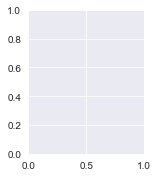

In [10]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.inspection import DecisionBoundaryDisplay

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0), make_circles(noise=0.2, factor=0.5, random_state=1), linearly_separable,]
# datasets = [useColumns, target]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
# preprocess dataset, split into training and test part
X = useColumns
y = target
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
if ds_cnt == 0:
    ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
            cmap=cm_bright, edgecolors="k")
# Plot the testing points
ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())    
i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    # DecisionBoundaryDisplay.from_estimator(
    #     clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
    # )
    # Plot the training points
    ax.scatter(
        X_train[:, 0], X_train[:,
                                1], c=y_train, cmap=cm_bright, edgecolors="k"
    )
    # Plot the testing points
    ax.scatter(
        X_test[:, 0],
        X_test[:, 1],
        c=y_test,
        cmap=cm_bright,
        edgecolors="k",
        alpha=0.6,
    )

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())
if ds_cnt == 0:
    ax.set_title(name)
ax.text(
    x_max - 0.3,
    y_min + 0.3,
    ("%.2f" % score).lstrip("0"),
    size=15,
    horizontalalignment="right",
)
        # i += 1

plt.tight_layout()
plt.show()
